In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from polygon import RESTClient
import datetime as dt
from pandas.tseries.offsets import BDay
from sklearn.linear_model import LinearRegression

import requests 
import time
import json
import seaborn as sns

client = RESTClient('tt2gOLH0fHAmPX70a4QURLFy59PRCZr3')
API_key = 'tt2gOLH0fHAmPX70a4QURLFy59PRCZr3'

In [833]:
ticker = 'AAPL'
filing_date_gte = '2022-01-01'
date_today = dt.datetime.now().date() - BDay(1)
date_today = date_today.strftime('%Y-%m-%d')
financials = []



In [936]:
import stock_data_functions
import importlib

# After editing stock_data_functions.py and saving changes:
importlib.reload(stock_data_functions)

from stock_data_functions import TickerData

class GroupComparison():

    def __init__(self, tickers : list[str], filing_date_gte : str):

        self.tickers = tickers
        self.filing_date_gte = filing_date_gte

        tickers_time_series = {}
        tickers_earning_dates = {}

        counter = 0
        for i in tickers:
            ticker_i                    = TickerData(i, self.filing_date_gte)
            ticker_i.get_ratios()
            ticker_i.plot_single_timeseries(plot = False)
            tickers_time_series[i]      = ticker_i.summary_data
            tickers_earning_dates[i]    = ticker_i.earning_dates_with_prices
            counter = counter + 1
            if len(tickers) > 5:
                time.sleep(15) 

        self.tickers_time_series        = pd.concat(tickers_time_series,axis=1)
        self.tickers_earnings           = tickers_earning_dates


    def calc_log_rets_all(self):

        df          = self.tickers_time_series
        for i in ['high', 'low', 'open', 'close', 'vwap']:
            df_i    = df.xs(i, axis =1, level =1)
            rets_i  = stock_data_functions.calc_log_rets(df_i)
            setattr(self, f"rets_{i}", rets_i)
    
            
    def analyse_correlations(self, ticker_X, ticker_y, plot : bool = True, returns : str = 'vwap'):
        """
        Given two tickers, compute the betas to each other, correlation, and plot scatter
        """

        attr_name   = f'rets_{returns}'
        rets        = getattr(self, attr_name, 'vwap')

        # Double brackets for target variable
        X           = rets[[ticker_X]]
        y           = rets[ticker_y]

        model       = LinearRegression(fit_intercept=False).fit(X,y)
        beta_coef   = model.coef_[0]
        r2          = model.score(X,y)

        if plot == True:
            plt.title(f'Slope : {np.round(beta_coef,2)}\nR^2 {np.round(r2,2)}')

            plt.scatter(X,y)
            plt.xlabel(f"{ticker_X}")
            plt.ylabel(f'{ticker_y}')
            plt.legend()
            plt.show()


In [879]:
top5 = GroupComparison(tickers[:5], filing_date_gte='2020-01-01')

Request URL: https://api.polygon.io/v2/aggs/ticker/NVDA/range/1/day/2020-01-01/2025-09-23?limit=5000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Tue, 23 Sep 2025 23:58:03 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Polygon-Cluster-Name': 'polygon-ny5', 'X-Request-Id': 'ecf516f0be8ba012a512ec0cd50fcbc9', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}
Request URL: https://api.polygon.io/v2/aggs/ticker/MSFT/range/1/day/2020-01-01/2025-09-23?limit=5000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Tue, 23 Sep 2025 23:58:04 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Enc

/var/folders/2_/q3fhp8js4zgd2w2m2cb4y8rh0000gn/T/ipykernel_97229/3665517197.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


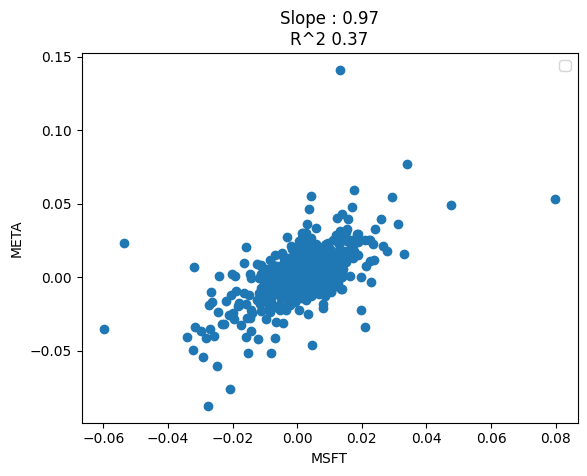

In [897]:
top5.calc_log_rets_all()
top5.analyse_correlations('MSFT', 'META')

In [900]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
rets_series = top5.
stock = 'NVDA'

In [917]:
adfuller_test = adfuller(
    x = rets_series[stock],
    maxlag = 30,
    regression= 'ct',
)

adfuller_test

(np.float64(-29.323856880689124),
 0.0,
 0,
 498,
 {'1%': np.float64(-3.977064629068685),
  '5%': np.float64(-3.419342866536224),
  '10%': np.float64(-3.1322579754349085)},
 np.float64(-1693.7877189373844))

In [775]:
range_df = df2 - df3

range_df_c = (range_df - range_df.mean())/range_df.std()
range_df_c.corr()

,MU,AMD,NVDA
MU,1.000000,0.419972,0.431227
AMD,0.419972,1.000000,0.238238
NVDA,0.431227,0.238238,1.000000


Text(0, 0.5, '$ Dollars')

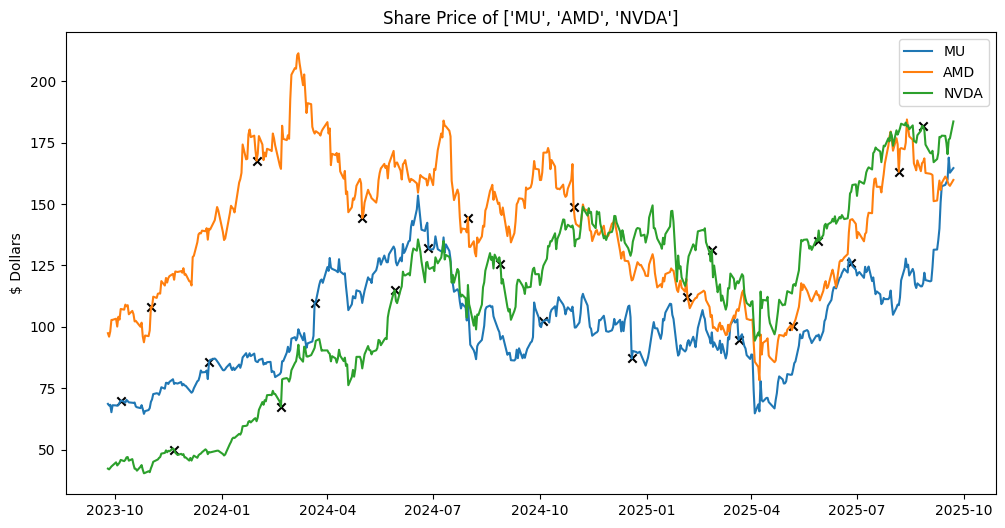

In [774]:
plt.figure(figsize=(12,6))

for i in tickers:
    price_returns = test.tickers_time_series[i].copy()
    earnings         = test.tickers_earnings[i]
    plt.scatter(earnings.index, earnings['close'],marker='x', color='black')
    plt.plot(price_returns['close'], label=i)
    plt.legend()
    
plt.title(f'Share Price of {tickers}')
plt.ylabel('$ Dollars')


    


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)   
pca.fit(rets)

# Components (eigenvectors, loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    index=rets.columns,
    columns=[f"PC{i+1}" for i in range(len(rets.columns))]
)

# Explained variance ratio
explained_var = pd.Series(pca.explained_variance_ratio_,
                          index=loadings.columns)

print("Explained variance ratio:")
print(explained_var)

print("\nLoadings (feature weights per PC):")
print(loadings)

# Transform data into PC scores
scores = pd.DataFrame(
    pca.transform(rets),
    index=rets.index,
    columns=loadings.columns
)


Explained variance ratio:
PC1    0.717164
PC2    0.173126
PC3    0.109710
dtype: float64

Loadings (feature weights per PC):
           PC1       PC2       PC3
MU    0.641544  0.753591 -0.143255
AMD   0.533588 -0.572578 -0.622445
NVDA  0.551094 -0.322887  0.769441


In [797]:
Boeing = TickerData('BA', filing_date_gte='2020-01-01')

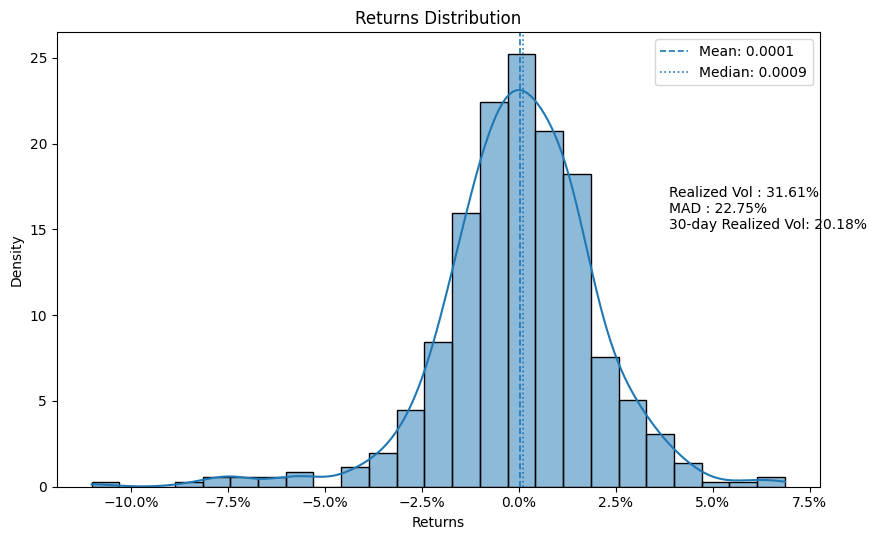

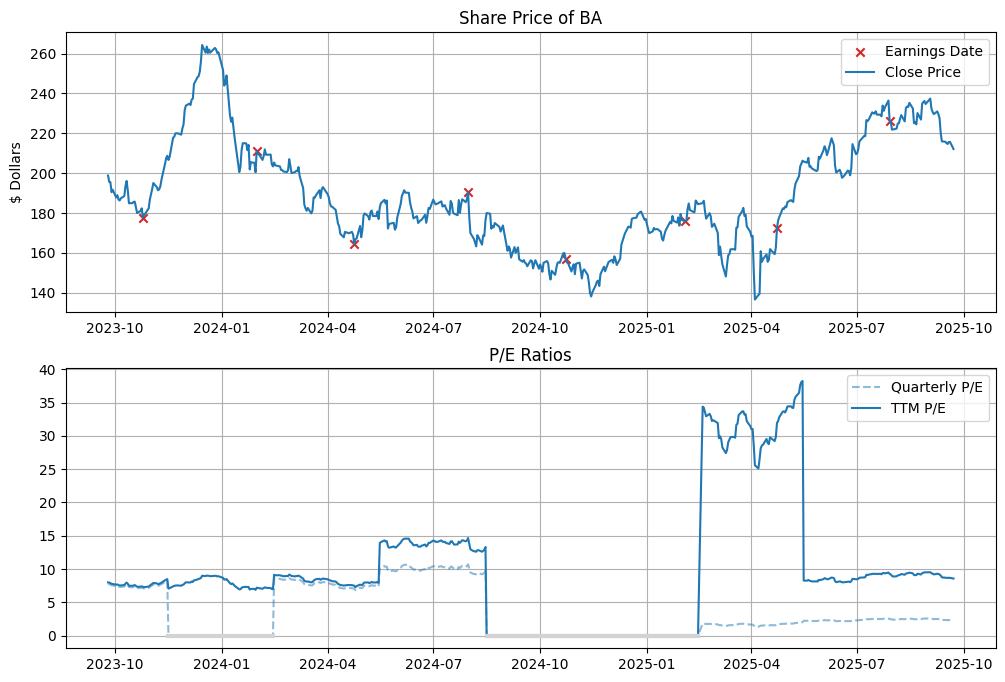

In [800]:
Boeing.get_ratios()
Boeing.plot_returns_distribution()
Boeing.plot_single_timeseries()

Request URL: https://api.polygon.io/v2/aggs/ticker/UBER/range/1/day/2020-01-01/2025-09-23?limit=5000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Tue, 23 Sep 2025 23:09:46 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Polygon-Cluster-Name': 'polygon-ny5', 'X-Request-Id': 'd6fcaf486bbb182e9afe73fd5622ff61', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}


<Axes: title={'center': 'Returns Distribution'}, xlabel='Returns', ylabel='Density'>

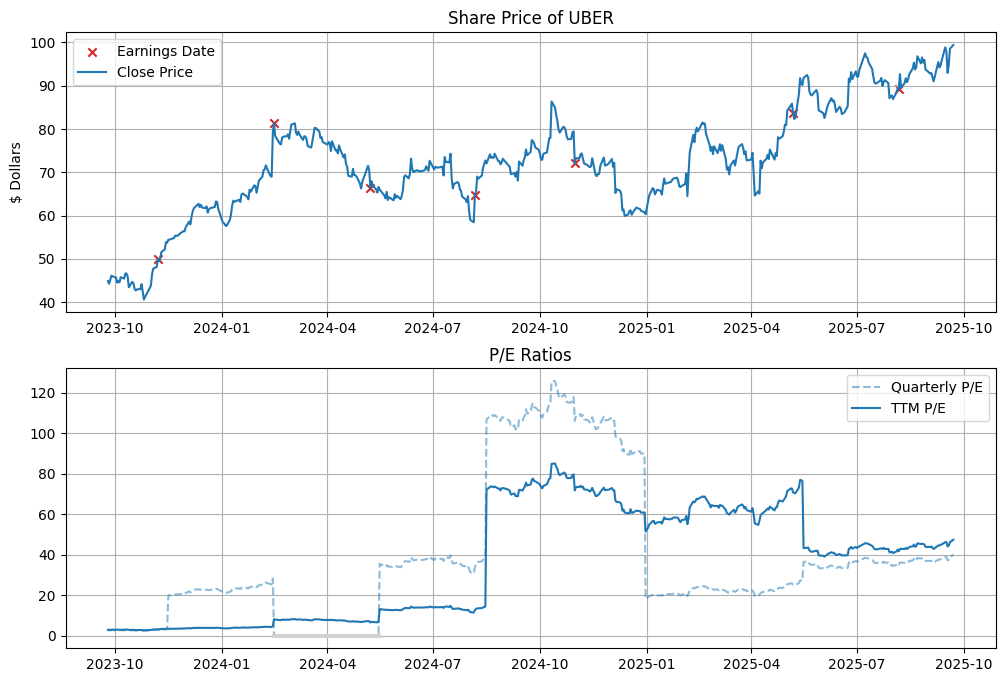

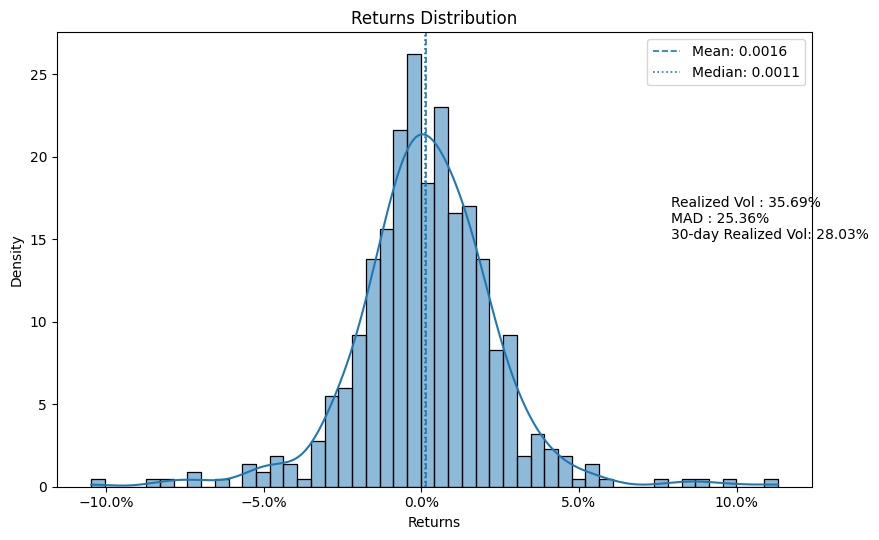

In [805]:
Uber = TickerData('UBER', filing_date_gte='2020-01-01')
Uber.plot_single_timeseries()
Uber.plot_returns_distribution(bins=50)

In [858]:
from stock_data_functions import get_top_N_US_stocks

In [ ]:
tickers = get_top_N_US_stocks(250)
tickers.remove('GOOGL')
tickers.remove('BRK.B')
tickers.remove('V')


/Users/phillip/Desktop/Moon2/stock_data_functions.py:41: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(resp.text)


In [ ]:
top_250_group = GroupComparison(tickers, filing_date_gte='2020-01-01')
top_250_group.calc_log_rets()

top_250_group.rets_high.to_csv('250 US stocks high returns')
top_250_group.rets_low.to_csv('250 US stocks low returns')
top_250_group.rets_close.to_csv('250 US stocks close returns')
top_250_group.rets_open.to_csv('250 US stocks open returns')
top_250_group.rets_vwap.to_csv('250 US stocks vwap returns')

In [952]:
GOOGL = TickerData('GOOG', filing_date_gte)

In [953]:
GOOGL.get_fundamental_data()

GOOG period 6: basic_avg_shares missing
GOOG period 6: diluted_avg_shares missing
GOOG period 7: basic_avg_shares missing
GOOG period 7: diluted_avg_shares missing
GOOG period 8: basic_avg_shares missing
GOOG period 8: diluted_avg_shares missing
GOOG period 9: basic_avg_shares missing
GOOG period 9: diluted_avg_shares missing
GOOG period 10: basic_avg_shares missing
GOOG period 10: diluted_avg_shares missing
GOOG period 11: basic_avg_shares missing
GOOG period 11: diluted_avg_shares missing
GOOG period 12: basic_avg_shares missing
GOOG period 12: diluted_avg_shares missing
GOOG period 13: basic_avg_shares missing
GOOG period 13: diluted_avg_shares missing
GOOG period 14: basic_avg_shares missing
GOOG period 14: diluted_avg_shares missing
GOOG period 15: basic_avg_shares missing
GOOG period 15: diluted_avg_shares missing
GOOG period 16: basic_avg_shares missing
GOOG period 16: diluted_avg_shares missing
GOOG period 17: basic_avg_shares missing
GOOG period 17: diluted_avg_shares missing


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1273]:
import stock_data_functions
import importlib

# After editing stock_data_functions.py and saving changes:
importlib.reload(stock_data_functions)

from stock_data_functions import TickerData

AMD = TickerData('AMD', filing_date_gte='2023-09-23')
AMD.get_historical_prices()
AMD.get_fundamental_data()
AMD.get_ratios()

Request URL: https://api.polygon.io/v2/aggs/ticker/AMD/range/1/day/2021-09-23/2025-09-23?limit=5000
Request Headers: {'Authorization': 'Bearer REDACTED', 'Accept-Encoding': 'gzip', 'User-Agent': 'Polygon.io PythonClient/1.15.3'}
Response Headers: {'Date': 'Wed, 24 Sep 2025 13:37:51 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Polygon-Cluster-Name': 'polygon-ny5', 'X-Request-Id': 'f3b281afee75ec282dcb3d19cb4c51d4', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains'}


In [1245]:
mask = GOOGL.fundamentals[['basic_avg_shares', 'diluted_eps']].isnull().all(axis=1) == True
raw_ = GOOGL.json_raw_df.get('results')
missing = GOOGL.fundamentals[mask]

In [ ]:

df["zscore"] = (df["returns"] - df["returns"].mean()) / df["returns"].std()

# Step 2: Define buckets
bins = [-np.inf, -2, -1, 1, 2, np.inf]
labels = ["Large Negative", "Moderate Negative", "Normal", "Moderate Positive", "Large Positive"]
df["bucket"] = pd.cut(df["zscore"], bins=bins, labels=labels)

# Step 3: Function to compute forward cumulative returns
def forward_cum_return(returns, window):
    """
    Compute forward cumulative returns over 'window' days.
    Assumes simple returns, not log returns.
    """
    cum_rets = (1 + returns).rolling(window).apply(np.prod, raw=True) - 1
    return cum_rets.shift(-window + 1)  # shift so result is aligned with start date

N = 5  # example: 5-day forward returns
df[f"fwd_{N}d_cumret"] = forward_cum_return(df["returns"], N)

# Step 4: Analyze average forward returns by bucket
bucket_forward_summary = df.groupby("bucket")[f"fwd_{N}d_cumret"].mean()

print(bucket_forward_summary)
